In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

EPI


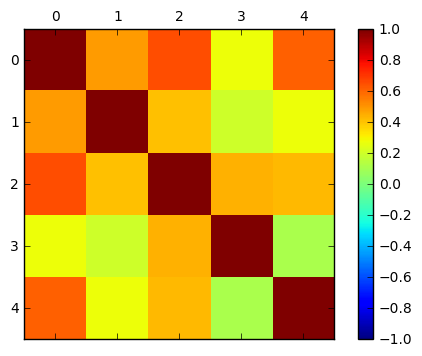

Rasopathies


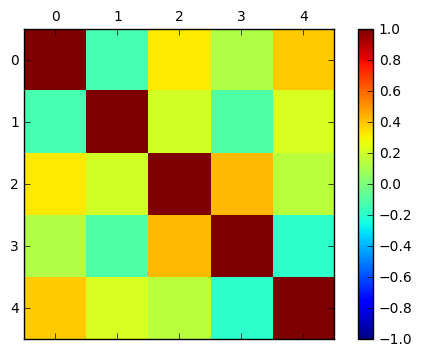

Cardiomyopathy


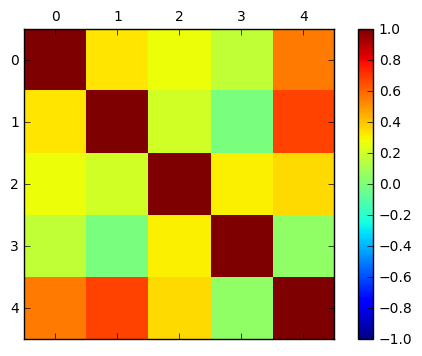

In [22]:
afile = '../data/interim/panel.dat'
df = pd.read_csv(afile, sep='\t')
cols = ['ccr', 'fathmm', 'vest', 'missense_badness', 'missense_depletion']

df_ls = []
for disease in set(df['Disease']):
    new_df = df[df.Disease==disease]
    print(disease)
    X = new_df[cols]
    c = X.corr(method='pearson')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(c, vmin=-1, vmax=1)
    fig.colorbar(cax)
    plt.show()
    
    c.loc[:, 'feat1'] = c.index
    m = pd.melt(c, id_vars=['feat1'], var_name='feat2', value_name='pcor')
    m.loc[:, 'disease'] = disease
    df_ls.append(m)
    
    #ticks = np.arange(0,9,1)
#    ax.set_xticks(ticks)
#    ax.set_yticks(ticks)
#    ax.set_xticklabels(cols)
#    ax.set_yticklabels(cols)
    
pd.concat(df_ls).to_csv('cor_mat', index=False, sep='\t')

In [11]:
c.head()

,ccr,fathmm,vest,missense_badness,missense_depletion
ccr,1.000000,0.333074,0.278453,0.171653,0.555036
fathmm,0.333074,1.000000,0.204651,-0.003697,0.675986
vest,0.278453,0.204651,1.000000,0.308884,0.353025
missense_badness,0.171653,-0.003697,0.308884,1.000000,0.050152
missense_depletion,0.555036,0.675986,0.353025,0.050152,1.000000


In [14]:
!jupyter nbconvert --to=python feature-importance.ipynb --stdout > test2.py

[NbConvertApp] Converting notebook feature-importance.ipynb to python


In [19]:
c.loc[:, 'feat1'] = c.index
m = pd.melt(c, id_vars=['feat1'], var_name='feat2', value_name='pcor').to_csv('cor_mat', index=False, sep='\t')
#m.head()
#c
#c.melt()